In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re   

In [31]:
url = "https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json"

In [32]:
df = pd.read_json(url, lines=True)
df


,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 10.9+ KB


Removing unwanted data


In [34]:
#such as in id = {'$oid': '50b59cd75bed76f46522c34e'} we only need '50b59cd75bed76f46522c34e' so
for i in range(df.shape[0]):
    #In '_id' is a dictionary and extract the value of '$oid'
    df['_id'] = df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

In [35]:
df


,_id,student_id,class_id,scores
0,50b59cd75bed76f46522c34e,0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,50b59cd75bed76f46522c34f,0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,50b59cd75bed76f46522c350,0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,50b59cd75bed76f46522c351,0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,50b59cd75bed76f46522c352,0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,50b59cd75bed76f46522c462,48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,50b59cd75bed76f46522c463,48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,50b59cd75bed76f46522c464,48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [36]:
df.scores[0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

Making 3 columns -> exam_score, quiz_score, homework_score
Final output -> id, student_id, class_id, exam_score, quiz_score, homework_score

In [37]:
#List Comprehension
#approach 1
exam_score = [round(float(re.sub('^{.*: |}', '', str(df['scores'][i][0]))), 2) for i in range(len(df['scores']))]
quiz_score = [round(float(re.sub('^{.*: |}', '', str(df['scores'][i][1]))), 2) for i in range(len(df['scores']))]



In [38]:
exam_score

[57.93,
 39.18,
 88.23,
 59.18,
 4.44,
 14.34,
 18.2,
 56.82,
 60.19,
 58.83,
 30.93,
 63.1,
 47.39,
 24.05,
 80.62,
 68.93,
 5.23,
 70.33,
 76.02,
 35.48,
 47.72,
 88.81,
 95.99,
 95.8,
 86.26,
 8.94,
 31.09,
 0.6,
 5.47,
 44.49,
 46.18,
 60.14,
 91.6,
 0.65,
 67.51,
 15.37,
 73.48,
 73.04,
 21.58,
 43.65,
 22.39,
 33.4,
 46.18,
 98.35,
 55.41,
 7.22,
 62.87,
 54.54,
 24.77,
 28.34,
 62.6,
 7.34,
 43.23,
 89.13,
 40.25,
 11.46,
 85.3,
 84.87,
 58.04,
 32.06,
 68.49,
 64.93,
 73.51,
 56.73,
 85.31,
 24.14,
 76.44,
 85.21,
 69.18,
 46.41,
 8.56,
 13.21,
 9.88,
 49.62,
 43.93,
 30.86,
 78.2,
 26.99,
 74.52,
 93.69,
 83.05,
 99.7,
 79.77,
 99.49,
 36.82,
 22.32,
 94.08,
 4.44,
 84.22,
 26.11,
 77.02,
 53.36,
 25.84,
 69.74,
 25.58,
 96.97,
 75.93,
 65.21,
 43.78,
 50.45,
 28.45,
 47.52,
 19.1,
 49.38,
 24.21,
 16.78,
 46.16,
 33.73,
 18.14,
 92.88,
 86.11,
 12.07,
 7.23,
 61.47,
 46.2,
 64.0,
 55.94,
 27.69,
 82.81,
 32.89,
 89.94,
 90.03,
 47.17,
 21.11,
 30.87,
 55.05,
 84.12,
 50.24,
 

In [39]:
#approach 2(wrong answer)
exam_scores = [round(i[0]['score'], 2) for i in df['scores']]

In [40]:
exam_scores

[57.93,
 39.18,
 88.23,
 59.18,
 4.44,
 14.34,
 18.2,
 56.82,
 60.19,
 58.83,
 30.93,
 63.1,
 47.39,
 24.05,
 80.62,
 68.93,
 5.23,
 70.33,
 76.02,
 35.48,
 47.72,
 88.81,
 95.99,
 95.8,
 86.26,
 8.94,
 31.09,
 0.6,
 5.47,
 44.49,
 46.18,
 60.14,
 91.6,
 0.65,
 67.51,
 15.37,
 73.48,
 73.04,
 21.58,
 43.65,
 22.39,
 33.4,
 46.18,
 98.35,
 55.41,
 7.22,
 62.87,
 54.54,
 24.77,
 28.34,
 62.6,
 7.34,
 43.23,
 89.13,
 40.25,
 11.46,
 85.3,
 84.87,
 58.04,
 32.06,
 68.49,
 64.93,
 73.51,
 56.73,
 85.31,
 24.14,
 76.44,
 85.21,
 69.18,
 46.41,
 8.56,
 13.21,
 9.88,
 49.62,
 43.93,
 30.86,
 78.2,
 26.99,
 74.52,
 93.69,
 83.05,
 99.7,
 79.77,
 99.49,
 36.82,
 22.32,
 94.08,
 4.44,
 84.22,
 26.11,
 77.02,
 53.36,
 25.84,
 69.74,
 25.58,
 96.97,
 75.93,
 65.21,
 43.78,
 50.45,
 28.45,
 47.52,
 19.1,
 49.38,
 24.21,
 16.78,
 46.16,
 33.73,
 18.14,
 92.88,
 86.11,
 12.07,
 7.23,
 61.47,
 46.2,
 64.0,
 55.94,
 27.69,
 82.81,
 32.89,
 89.94,
 90.03,
 47.17,
 21.11,
 30.87,
 55.05,
 84.12,
 50.24,
 

In [41]:
#mean of all the elements in the list
""" homework_score = []
for i in range(len(df['scores'])):
    homework_score = re.findall('\d+.\d+', str(df['scores'][i][2:]))
    #print(list(map(float, li)))
    
    print(round(np.mean(list(map(float, homework_score))), 2))"""
    
    

" homework_score = []\nfor i in range(len(df['scores'])):\n    homework_score = re.findall('\\d+.\\d+', str(df['scores'][i][2:]))\n    #print(list(map(float, li)))\n    \n    print(round(np.mean(list(map(float, homework_score))), 2))"

In [42]:
homework_score = []
for i in range(len(df['scores'])):
    homework_score.append(round(sum(list(map(float, re.findall('\d+.\d+', str(df['scores'][i][2:])))))/len(df['scores'][i][2:]), 2))
    
    

In [43]:
homework_score

[51.65,
 48.94,
 37.29,
 51.12,
 85.35,
 57.72,
 74.04,
 73.18,
 82.81,
 49.05,
 59.41,
 34.69,
 24.75,
 80.02,
 63.43,
 50.0,
 49.35,
 78.95,
 48.69,
 62.63,
 77.05,
 27.45,
 28.3,
 79.61,
 65.54,
 56.07,
 38.85,
 64.12,
 72.57,
 63.64,
 66.8,
 38.88,
 67.87,
 49.42,
 60.25,
 62.13,
 63.73,
 35.59,
 46.35,
 71.01,
 49.96,
 65.41,
 38.58,
 47.36,
 5.33,
 41.97,
 32.34,
 26.46,
 34.32,
 42.41,
 59.89,
 84.12,
 69.13,
 36.18,
 47.14,
 61.65,
 88.8,
 33.42,
 98.92,
 7.11,
 48.58,
 59.41,
 85.84,
 45.72,
 50.51,
 34.56,
 47.23,
 52.77,
 47.43,
 46.31,
 51.99,
 13.59,
 68.15,
 51.82,
 35.32,
 92.25,
 41.99,
 70.65,
 44.89,
 31.46,
 43.27,
 93.56,
 53.63,
 13.96,
 46.2,
 19.4,
 26.19,
 40.47,
 48.14,
 42.46,
 45.85,
 22.42,
 58.38,
 87.0,
 26.28,
 33.16,
 64.7,
 33.41,
 39.08,
 63.59,
 66.01,
 72.53,
 23.57,
 43.92,
 52.52,
 10.42,
 57.29,
 73.13,
 37.03,
 53.06,
 56.44,
 28.85,
 52.69,
 49.99,
 53.76,
 42.92,
 44.52,
 49.03,
 91.91,
 11.5,
 43.28,
 63.82,
 49.66,
 78.34,
 45.13,
 79.95,
 36

In [44]:
new_df = pd.DataFrame({"id":df['_id'], "student_id":df['student_id'], "class_id":df['class_id'], 
                    "exam_score": exam_score, "quiz_score": quiz_score, "homework_score": homework_score})

In [45]:
new_df

,id,student_id,class_id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,2,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,0,28,39.18,78.44,48.94
2,50b59cd75bed76f46522c350,0,5,88.23,79.29,37.29
3,50b59cd75bed76f46522c351,0,16,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,0,24,4.44,28.63,85.35
...,...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,48,14,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,48,8,87.50,77.95,60.19
278,50b59cd75bed76f46522c464,48,15,17.49,26.63,52.28


Analysis


In [62]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    object 
 1   exam_score      280 non-null    float64
 2   quiz_score      280 non-null    float64
 3   homework_score  280 non-null    float64
dtypes: float64(3), object(1)
memory usage: 19.0+ KB


In [46]:
new_df.describe()

,student_id,class_id,exam_score,quiz_score,homework_score
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,23.717857,15.096429,50.831143,48.960893,48.654464
std,14.314029,8.958766,28.709625,29.398710,20.154817
min,0.000000,0.000000,0.500000,0.720000,4.790000
25%,11.000000,7.000000,24.117500,23.837500,34.517500
50%,24.000000,15.500000,49.685000,49.850000,48.370000
75%,37.000000,23.000000,75.517500,72.822500,61.672500
max,49.000000,30.000000,99.980000,99.910000,98.920000


In [47]:
#droping the class_id
new_df.drop('class_id', inplace=True, axis=1)



In [48]:
new_df

,id,student_id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,0,39.18,78.44,48.94
2,50b59cd75bed76f46522c350,0,88.23,79.29,37.29
3,50b59cd75bed76f46522c351,0,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,0,4.44,28.63,85.35
...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,48,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,48,87.50,77.95,60.19
278,50b59cd75bed76f46522c464,48,17.49,26.63,52.28


In [49]:
new_df.drop(['student_id'], axis = 1,  inplace=True)
new_df

,id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,39.18,78.44,48.94
2,50b59cd75bed76f46522c350,88.23,79.29,37.29
3,50b59cd75bed76f46522c351,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,4.44,28.63,85.35
...,...,...,...,...
275,50b59cd75bed76f46522c461,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,87.50,77.95,60.19
278,50b59cd75bed76f46522c464,17.49,26.63,52.28


Plotting the exam_score, homework_score 


In [50]:
""" example - exam_score[20:30]
    homework_socre[20:30]
    labels & title """

' example - exam_score[20:30]\n    homework_socre[20:30]\n    labels & title '

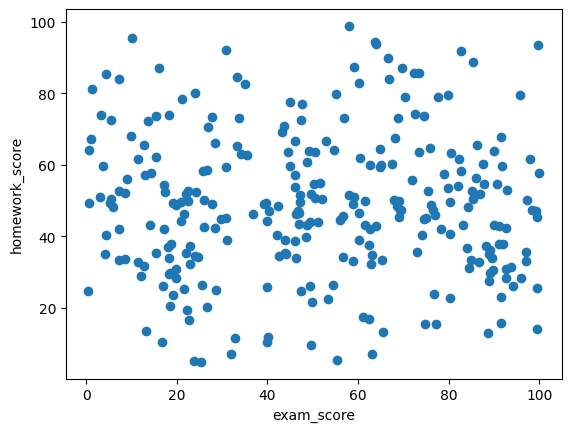

In [55]:
x = new_df.exam_score
y = new_df.homework_score
plt.xlabel("exam_score")
plt.ylabel("homework_score")
plt.scatter(x, y)

<BarContainer object of 3 artists>

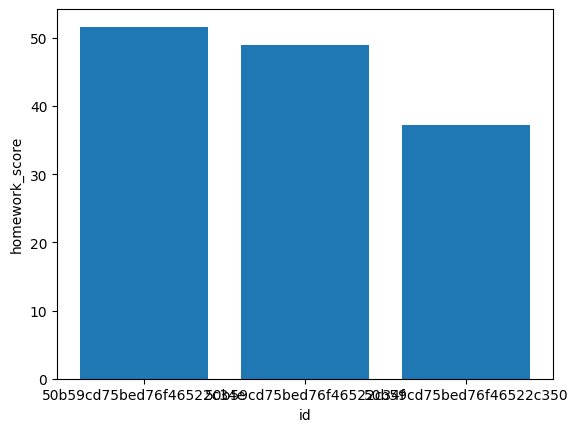

In [61]:
x = new_df.id[0:3]
y = new_df.homework_score[0:3]
plt.xlabel("id")
plt.ylabel("homework_score")
plt.bar(x, y)